<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/Homework_Week5_FuzzyLogic/blob/main/Children_Clothing_Selection_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=89eb092059e35890e25f11fc2897aa5514ebf4c7b4f8ba72356f9979b3babbbb
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


11.38720025408925


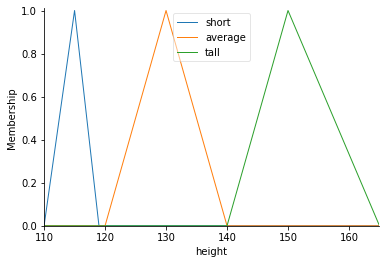

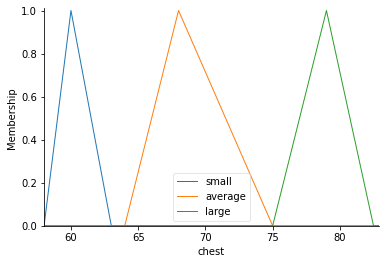

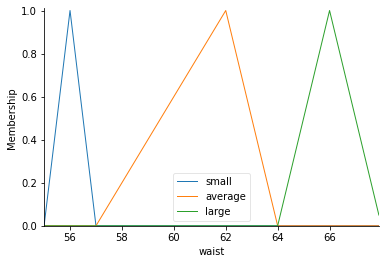

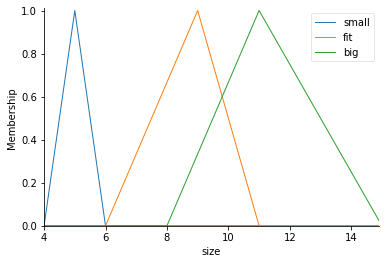

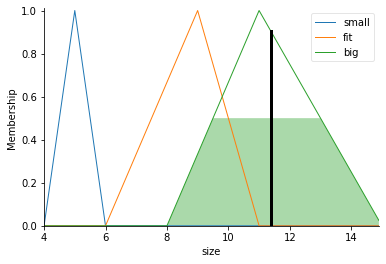

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

height = ctrl.Antecedent(np.arange(110,165,0.1),'height')
chest = ctrl.Antecedent(np.arange(58,83,0.1),'chest')
waist = ctrl.Antecedent(np.arange(55,68,0.1),'waist')
size = ctrl.Consequent(np.arange(4,15,0.1),'size')

height['short'] = fuzz.trimf(height.universe,[110,115,119])
height['average'] = fuzz.trimf(height.universe,[120,130,140])
height['tall'] = fuzz.trimf(height.universe,[140,150,165])

chest['small'] = fuzz.trimf(chest.universe,[58,60,63])
chest['average'] = fuzz.trimf(chest.universe,[64,68,75])
chest['large'] = fuzz.trimf(chest.universe,[75,79,82.5])

waist['small'] = fuzz.trimf(waist.universe,[55,56,57])
waist['average'] = fuzz.trimf(waist.universe,[57,62,64])
waist['large'] = fuzz.trimf(waist.universe,[64,66,68])

size['small'] = fuzz.trimf(size.universe,[4,5,6])
size['fit'] = fuzz.trimf(size.universe,[6,9,11])
size['big'] = fuzz.trimf(size.universe,[8,11,15])

height.view()
chest.view()
waist.view()
size.view()

rule1 = ctrl.Rule(height['short']&chest['small']&waist['small'],size['small'])
rule2 = ctrl.Rule(height['short']&chest['small']&waist['average'],size['small'])
rule3 = ctrl.Rule(height['short']&chest['small']&waist['large'],size['fit'])

rule4 = ctrl.Rule(height['short']&chest['average']&waist['small'],size['small'])
rule5 = ctrl.Rule(height['short']&chest['average']&waist['average'],size['fit'])
rule6 = ctrl.Rule(height['short']&chest['average']&waist['large'],size['fit'])

rule7 = ctrl.Rule(height['short']&chest['large']&waist['small'],size['fit'])
rule8 = ctrl.Rule(height['short']&chest['large']&waist['average'],size['fit'])
rule9 = ctrl.Rule(height['short']&chest['large']&waist['large'],size['fit'])

rule10 = ctrl.Rule(height['average']&chest['small']&waist['small'],size['small'])
rule11 = ctrl.Rule(height['average']&chest['small']&waist['average'],size['fit'])
rule12 = ctrl.Rule(height['average']&chest['small']&waist['large'],size['fit'])

rule13 = ctrl.Rule(height['average']&chest['average']&waist['small'],size['fit'])
rule14 = ctrl.Rule(height['average']&chest['average']&waist['average'],size['fit'])
rule15 = ctrl.Rule(height['average']&chest['average']&waist['large'],size['big'])

rule16 = ctrl.Rule(height['average']&chest['large']&waist['small'],size['fit'])
rule17 = ctrl.Rule(height['average']&chest['large']&waist['average'],size['big'])
rule18 = ctrl.Rule(height['average']&chest['large']&waist['large'],size['big'])

rule19 = ctrl.Rule(height['tall']&chest['small']&waist['small'],size['small'])
rule20 = ctrl.Rule(height['tall']&chest['small']&waist['average'],size['fit'])
rule21 = ctrl.Rule(height['tall']&chest['small']&waist['large'],size['fit'])

rule22 = ctrl.Rule(height['tall']&chest['average']&waist['small'],size['fit'])
rule23 = ctrl.Rule(height['tall']&chest['average']&waist['average'],size['fit'])
rule24 = ctrl.Rule(height['tall']&chest['average']&waist['large'],size['big'])

rule25 = ctrl.Rule(height['tall']&chest['large']&waist['small'],size['fit'])
rule26 = ctrl.Rule(height['tall']&chest['large']&waist['average'],size['big'])
rule27 = ctrl.Rule(height['tall']&chest['large']&waist['large'],size['big'])

size_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                rule21,rule22,rule23,rule24,rule25,rule26,rule27])
sizing = ctrl.ControlSystemSimulation(size_ctrl)
sizing.input['height'] = 150
sizing.input['chest'] = 80
sizing.input['waist'] = 65
sizing.compute()
print(sizing.output['size'])
size.view(sim = sizing)

